# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [26]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.vel=np.zeros(num_of_coefs)
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.cache=self.gama*self.cache+(1-self.gama)*np.multiply(gradient,gradient)
        z=self.learning_rate/np.sqrt(self.cache+self.eps)
        self.coef=np.add(self.coef, z*gradient)
        #self.coef=np.add(self.coef, self.learning_rate*gradient)
        return
                    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
       
        self.vel=np.add(-self.mu*self.vel, self.learning_rate*gradient)
        self.coef=np.add(self.coef, self.vel)
        return
    
    def fit(self, X, y, update_rule, plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                error=(y[i]-np.dot(X[i], self.coef))
                       
                # Compute gradients
                gradient=np.zeros(6)
                gradient=np.multiply(error,X[i])-self.regularization*self.coef
                #gradient[0]+= self.regularization*self.coef[0]

                
                # Update weights
                if update_rule=='sgd_momentum':
                       self.sgd_momentum(gradient)
                if update_rule=='rmsprop':
                       self.rmsprop(gradient)
            # end of epoch iteration
                       
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        
                       
        self.lowest_mse = mse[0]
        for i in mse:
            if i<self.lowest_mse:
                self.lowest_mse=i
                
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
        return self.lowest_mse


        
    def linearPredict(self, X_features):
        return np.dot(X_features, self.coef)
    
    
    def get_features(self, X):
        num_terms=6
        x = np.zeros((X.shape[0], num_terms))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0] * (X[:,1]**2)
        x[:,5] = X[:,1]**3
        return x
       

# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

<ipython-input-26-31073f08768f>:79: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
<ipython-input-26-31073f08768f>:66: RuntimeWarning: overflow encountered in multiply
  gradient=np.multiply(error,X[i])-self.regularization*self.coef
<ipython-input-26-31073f08768f>:66: RuntimeWarning: invalid value encountered in multiply
  gradient=np.multiply(error,X[i])-self.regularization*self.coef
<ipython-input-26-31073f08768f>:38: RuntimeWarning: invalid value encountered in add
  self.coef=np.add(self.coef, self.vel)


The best 2 MSE are 0.020189844816041667  ,  0.02032101434520441
best learning rate is   0.01
best  regularisation paramter is   0
2nd best learning rate is   0.01
2nd best  regularisation paramter is   0.01


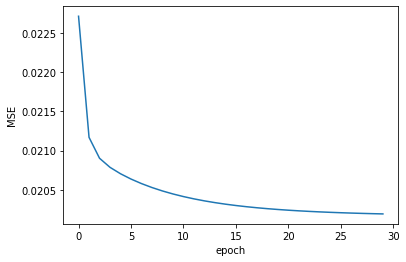

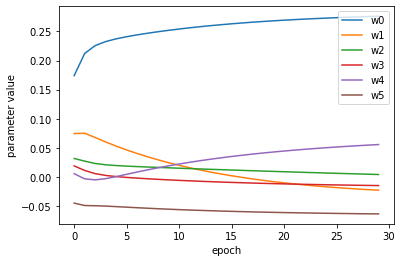

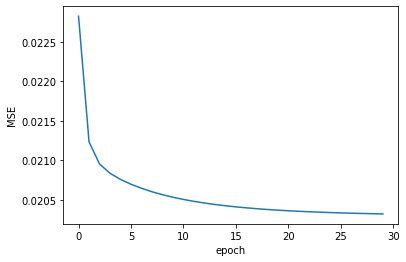

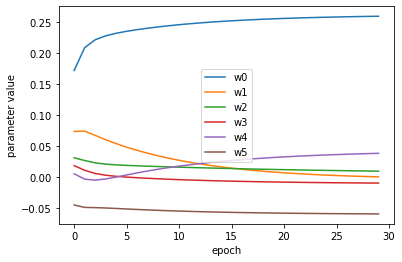

In [27]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

mse_iter=[]
for i in learning_rate:
    for j in regularization:
        #print(i,j)
        rr=LinearRegression(i,j,n_epochs)
        mse_iter.append(rr.fit(X, y,'sgd_momentum',False))

#print(mse_iter)
min_mse=np.nanmin(mse_iter)
if np.isnan(min_mse):
    print("Solution did not converge")
    
else:
    min_mse_2nd=float('inf')
    for i in range(len(mse_iter)):
        if min_mse<mse_iter[i]:
            if min_mse_2nd > mse_iter[i]:
                min_mse_2nd = mse_iter[i]
    print("The best 2 MSE are "+str(min_mse)+'  ,  '+str(min_mse_2nd))
    for i in range(len(mse_iter)):
        if mse_iter[i]==min_mse:
            index=i
            best_lr=learning_rate[int(index/len(regularization))]
            best_reg=regularization[int(index%len(regularization))]
            print("best learning rate is   "+ str(best_lr))
            print("best  regularisation paramter is   "+ str(best_reg))
            rr=LinearRegression(best_lr,best_reg,n_epochs)
            mse_iter.append(rr.fit(X, y,'sgd_momentum',True))       
            break
    
    for i in range(len(mse_iter)):
        if mse_iter[i]==min_mse_2nd:
            index=i
            best_lr=learning_rate[int(index/len(regularization))]
            best_reg=regularization[int(index%len(regularization))]
            print("2nd best learning rate is   "+ str(best_lr))
            print("2nd best  regularisation paramter is   "+ str(best_reg))
            rr=LinearRegression(best_lr,best_reg,n_epochs)
            mse_iter.append(rr.fit(X, y,'sgd_momentum',True))       
            break


[0.02124331841110317, 0.021240116208660197, 0.02207065345155763, 0.020203078865835295, 0.020331738674300225, 0.021931566258736383, 0.029011950905738482, 0.02939079819410332, 0.03241768566992876, 0.05657456050351868, 0.061365392795938174, 0.07174014433428985]
The best 2 MSE are 0.020203078865835295  ,  0.020331738674300225
best learning rate is   0.001
best  regularisation paramter is   0
2nd best learning rate is   0.001
2nd best  regularisation paramter is   0.01


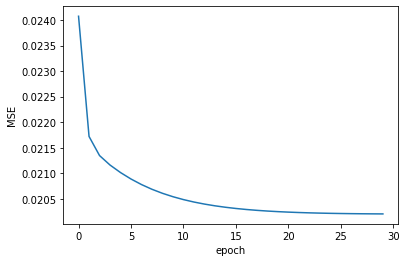

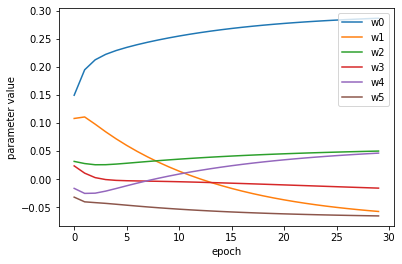

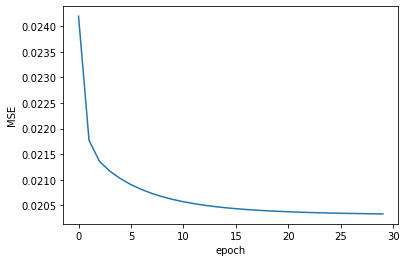

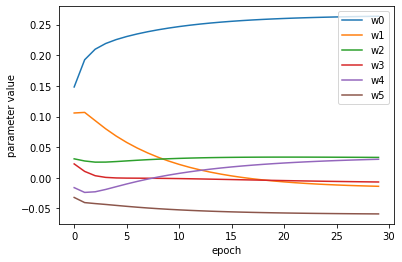

In [28]:
mse_iter=[]
for i in learning_rate:
    for j in regularization:
        #print(i,j)
        rr=LinearRegression(i,j,n_epochs)
        mse_iter.append(rr.fit(X, y,'rmsprop',False))

print(mse_iter)
min_mse=np.nanmin(mse_iter)
if np.isnan(min_mse):
    print("Solution did not converge")
    
else:
    min_mse_2nd=float('inf')
    for i in range(len(mse_iter)):
        if min_mse<mse_iter[i]:
            if min_mse_2nd > mse_iter[i]:
                min_mse_2nd = mse_iter[i]
    print("The best 2 MSE are "+str(min_mse)+'  ,  '+str(min_mse_2nd))
    for i in range(len(mse_iter)):
        if mse_iter[i]==min_mse:
            index=i
            #print(index)
            best_lr=learning_rate[int(index/len(regularization))]
            best_reg=regularization[int(index%len(regularization))]
            print("best learning rate is   "+ str(best_lr))
            print("best  regularisation paramter is   "+ str(best_reg))
            rr=LinearRegression(best_lr,best_reg,n_epochs)
            mse_iter.append(rr.fit(X, y,'rmsprop',True))       
            break
    
    for i in range(len(mse_iter)):
        if mse_iter[i]==min_mse_2nd:
            index=i
            #print(index)
            best_lr=learning_rate[int(index/len(regularization))]
            best_reg=regularization[int(index%len(regularization))]
            print("2nd best learning rate is   "+ str(best_lr))
            print("2nd best  regularisation paramter is   "+ str(best_reg))
            rr=LinearRegression(best_lr,best_reg,n_epochs)
            mse_iter.append(rr.fit(X, y,'rmsprop',True))       
            break


# Answer:

Overall, SGD Momentum gives better lowest results (in terms of MSE) compared to RMSProp.  

On using regularization, momemtum converges faster than RMSProp. 
But SGD momentum also overfits faster.  On using more epoch SGD momemtum deviates more aggressively from minimum MSE.

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

# a)

| Activation Function | Training Loss | Test Loss |
| --- | --- | --- |
| Tanh | 0.203 | 0.185 |
|Linear| 0.490|0.505


 The decision boundary for tanh function is more non linear, so it can capture the nonlinearties in the data set easily. The decision boundary for the linear activation function is highly linear and unable to capture the nonlinearties in the data and hence the higher training and test error rate.

# b)

| Number of neurons| Training Loss | Test Loss |
| --- | --- | --- |
| 4 | 0.028 | 0.010 |
|8| 0.024|0.007|

the decision boundary is very sharp in the case of 8 neurons than 4 neurons. This could be due to increase in neurons adds the number of paramaters and hence it can be highly non linear compared to the 4 neurons. However, the test and training loss are almost similar in both the cases.

# c)

|Learning rate | Training Loss 100 epochs| Test Loss 100 epochs | Training Loss 1000 epochs| Test Loss 1000 epochs |
| --- | --- | --- |--- | --- | 
| 10 | 1.120 | 1.032|0.952|0.960|
|1| 0.000|0.005|0.000|0.001|
| 0.1 | 0.004 | 0.005 |0.000|0.000|
|0.01| 0.133|0.125|0.011|0.010|
|0.001| 0.298|0.286|0.057|0.048|

# Change of Loss Vs learning rate

As higher learning rates, the convergence is faster. Whereas at lower learning rates the convergence is not so fast 


# Change of Loss Vs number of epochs

The training and test losses are more at higher learning rates at 1000 epochs than 100 epochs, it implies as the number of epoch increases, the effective number of parameters increases and hence over fitting. At lower learning rates, the training and test losses are lower for 1000 epochs than 100 epochs, beacause the model has learnt more with higher number of epochs and it has not over fitted the model yet.

# d)

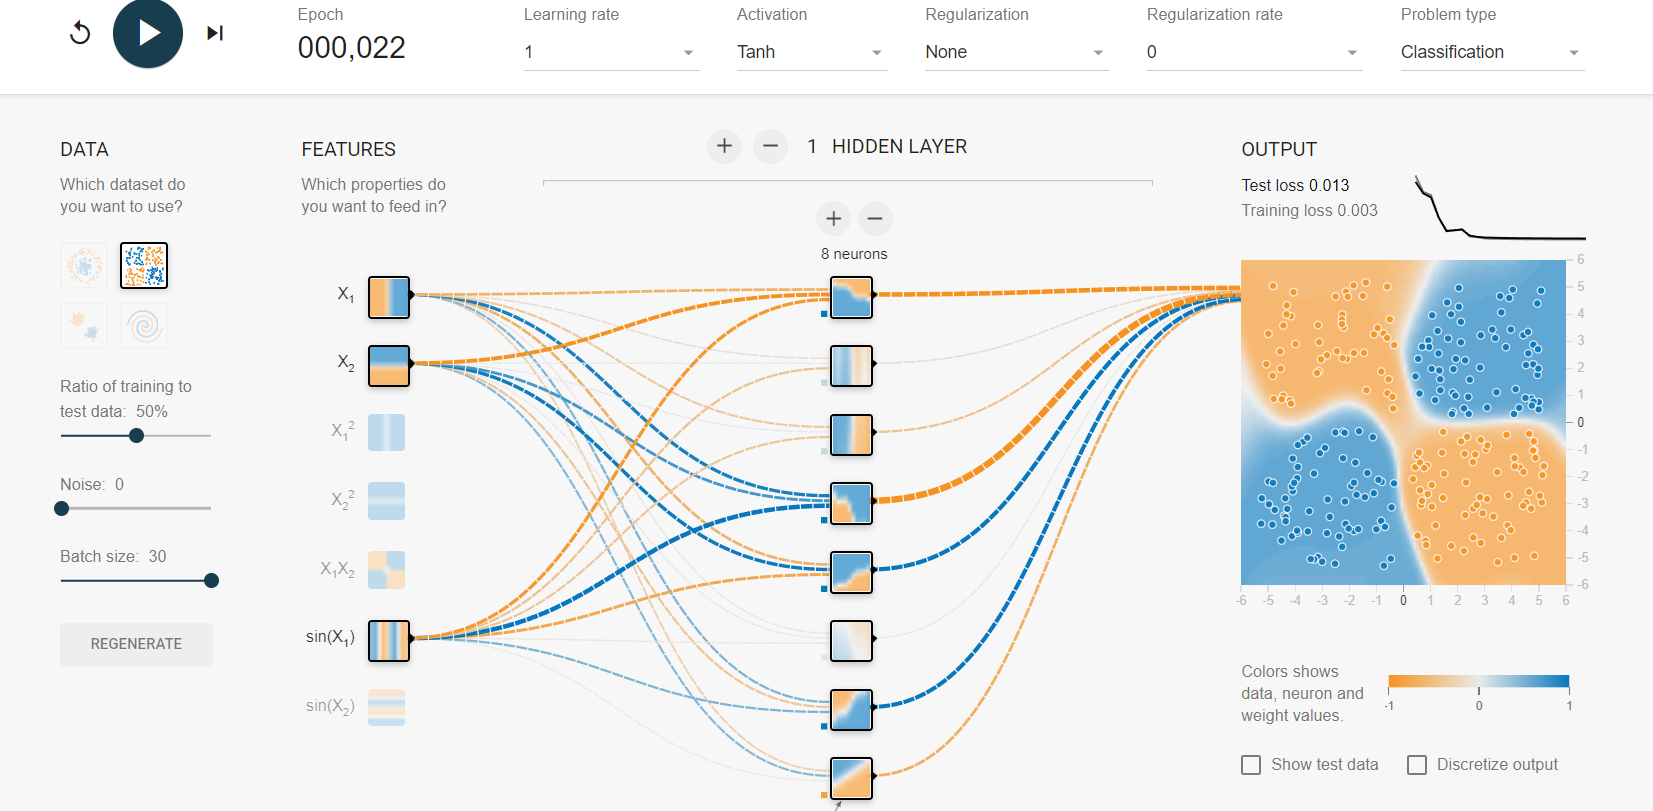

Adding sin and taking a hidden layer with 8 neurons reducing the error very quickly. it took 23 epochs to reach the said error

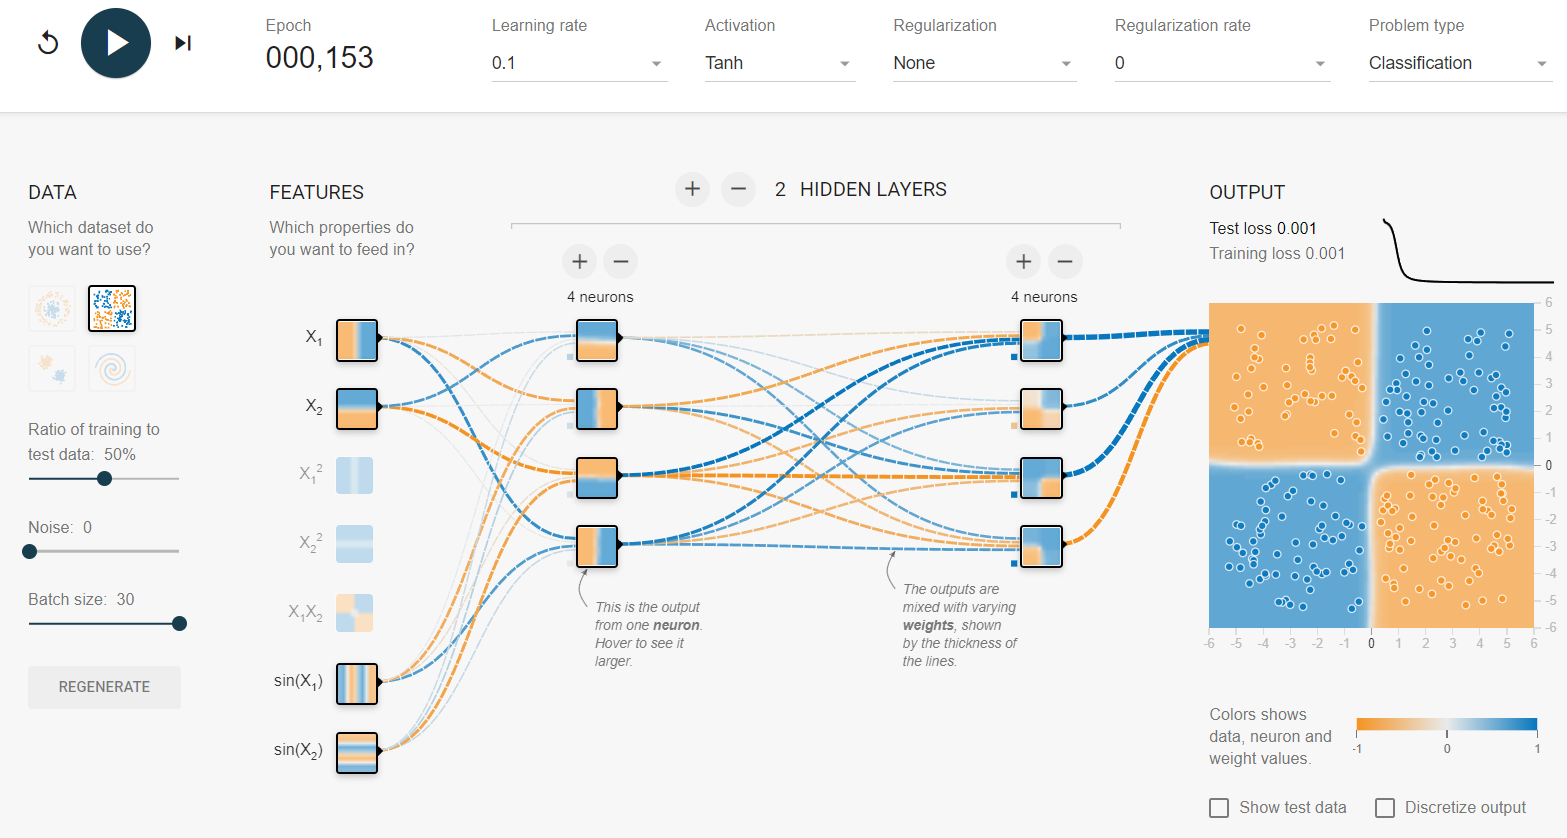

Similar case has been observed with 2 sin features and taking 2 hidden layers with 4 and 4 neurons respectively. it took 153 epochs to reach the said error

Increasing number of input features, that too non linear features that are square based and sinusoidal in type, helps the model train better.

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [29]:
# install pyod using pip first
!pip install pyod

In [30]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [31]:
# (a)
from pyod.models.mcd import MCD
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

clf = MCD() # initialize MCD class using the default parameters
clf.fit(X_train)
y_train_pred = clf.predict(X_train)
# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores


In [32]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results
# evaluate and print the results
print("On Test Data:")
evaluate_print('MCD', y_test, y_test_scores)



On Test Data:
MCD ROC:0.8689, precision @ rank n:0.6


C:\Users\saite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\saite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


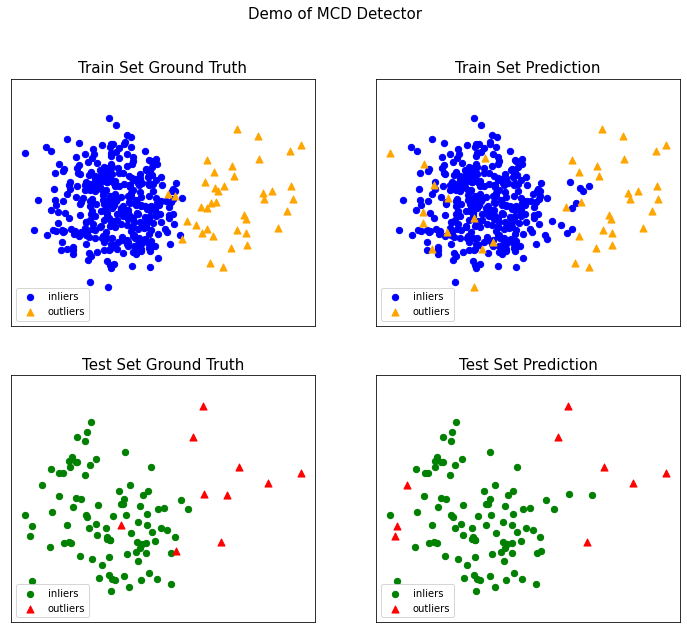

In [33]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
clf.fit(X_train)

# Fit pca to X_train and X_test and transform 
train_principalComponents =  pca.fit_transform(X_train)
test_principalComponents =  pca.fit_transform(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

# YOUR CODE SHOULD COME HERE
# visualize the results
visualize('MCD', train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)



In [34]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

clf = CBLOF()
clf.fit(X_train)

y_train_pred = clf.predict(X_train)
# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores
print("On Test Data:")
evaluate_print('CBLOF', y_test, y_test_scores)


On Test Data:
CBLOF ROC:0.9, precision @ rank n:0.6


C:\Users\saite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\saite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


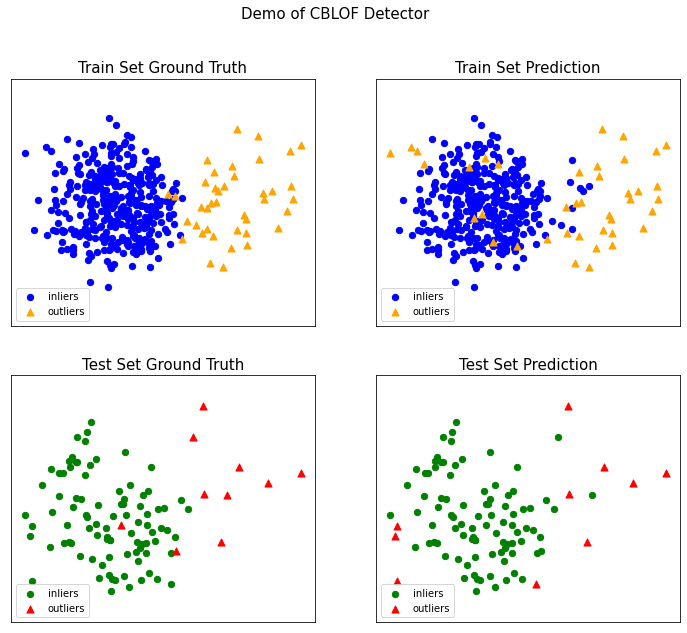

In [35]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
clf.fit(X_train)

# Fit pca to X_train and X_test and transform 
train_principalComponents =  pca.fit_transform(X_train)
test_principalComponents =  pca.fit_transform(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

# YOUR CODE SHOULD COME HERE
# visualize the results
visualize('CBLOF', train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)



In [36]:
clf = COPOD()
clf.fit(X_train)

y_test_pred = clf.predict(X_train)
# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores
print("On Test Data:")
evaluate_print('COPOD', y_test, y_test_scores)


On Test Data:
COPOD ROC:0.9556, precision @ rank n:0.8


C:\Users\saite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\saite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


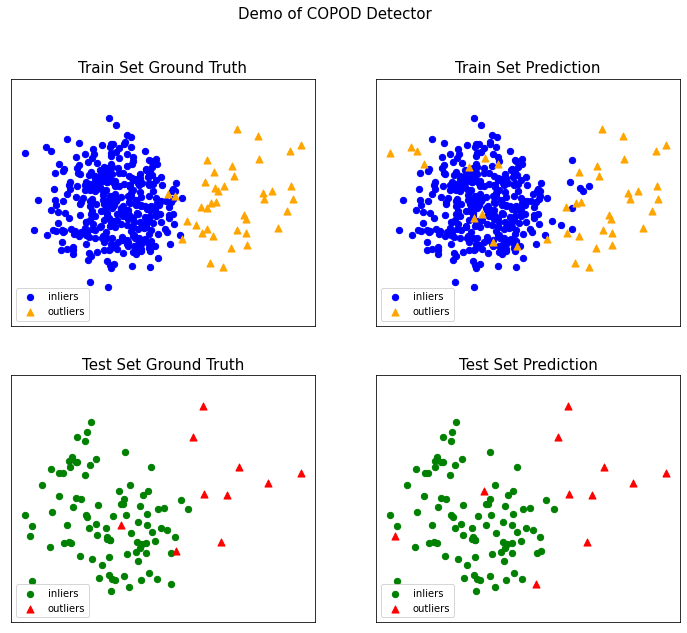

In [37]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
clf.fit(X_train)

# Fit pca to X_train and X_test and transform 
train_principalComponents =  pca.fit_transform(X_train)
test_principalComponents =  pca.fit_transform(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

# YOUR CODE SHOULD COME HERE
# visualize the results
visualize('COPOD', train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)



 COPOD is better than CBLOF and CBD in terms of ROC and CBLOF is better than CBD.

In terms of Rank, both CBD and CBLOF have rank of 0.6 and COPOD has higher rank of 0.8

The above trend is apparent from the visulatizations in terms of mismatches between various algorithms for test set ground truth and predictions

# Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

Principal component analysis is an unsupervised feature extraction technique which reduces the number of features of the dataset, by maintaing an optimal level of variability in the dataset. PCA is a linear transformation, that is hypothesised around finding vector directions where the variation of the data is best explained. This transformation is thus carried out in form of optimization and tries to find transformation ratios for all the features and project the instances in the direction where the variation is maximized.

Following, another vector direction is computed to explain the variation that the first vector component failed to realize. This variation is primarily the projection of instances on the vector orthogonal to the primary component vector. This process of optimization and orthogonal variance computation is iteratively carried out till the entire dataset is explained using computed vectors. This process is equivalent to computing eigenvalues and eigenvectors of covariance matrix. The sum of eigenvalues of selected eigenvectors helps to determine the amount of varaiation of data explained.




# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [38]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [39]:
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeatur

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [40]:
data_dm=data.copy()
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
data_dm['binned_yr_built']=pd.cut(data_dm['YearBuilt'], bins=bins, labels=labels,include_lowest=True)
data_dm['binned_yr_built']

0       2000-2020
1       1960-1980
2       2000-2020
3       1900-1920
4       1980-2000
          ...    
1455    1980-2000
1456    1960-1980
1457    1940-1960
1458    1940-1960
1459    1960-1980
Name: binned_yr_built, Length: 1460, dtype: category
Categories (6, object): ['1900-1920' < '1920-1940' < '1940-1960' < '1960-1980' < '1980-2000' < '2000-2020']

In [41]:
data_dm = pd.get_dummies(data_dm, columns=['binned_yr_built'], prefix='YearBuilt')

In [42]:
data_dm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MiscVal,MoSold,YrSold,SalePrice,YearBuilt_1900-1920,YearBuilt_1920-1940,YearBuilt_1940-1960,YearBuilt_1960-1980,YearBuilt_1980-2000,YearBuilt_2000-2020
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,2,2008,208500,0,0,0,0,0,1
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,5,2007,181500,0,0,0,1,0,0
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,9,2008,223500,0,0,0,0,0,1
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,2,2006,140000,1,0,0,0,0,0
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,12,2008,250000,0,0,0,0,1,0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [43]:
cols = data_dm.columns[data_dm.isnull().mean()>0.5]
data_dm.drop(cols, axis=1)
cols

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [44]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean
print('Sample Mean is '+str(np.mean(sample_ages)))
#Population mean
print("population mean is " +str(data['SalePrice'].mean()))

Sample Mean is 178292.63125
population mean is 180921.19589041095


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [45]:
np.random.seed(10)
import scipy.stats as stats
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the critical Z value
z_critical=stats.norm.ppf(.975)

#Get population standard deviation
pop_stdev=data_dm['SalePrice'].std()

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
confidence_interval

(166522.08555078227, 197662.97444921773)

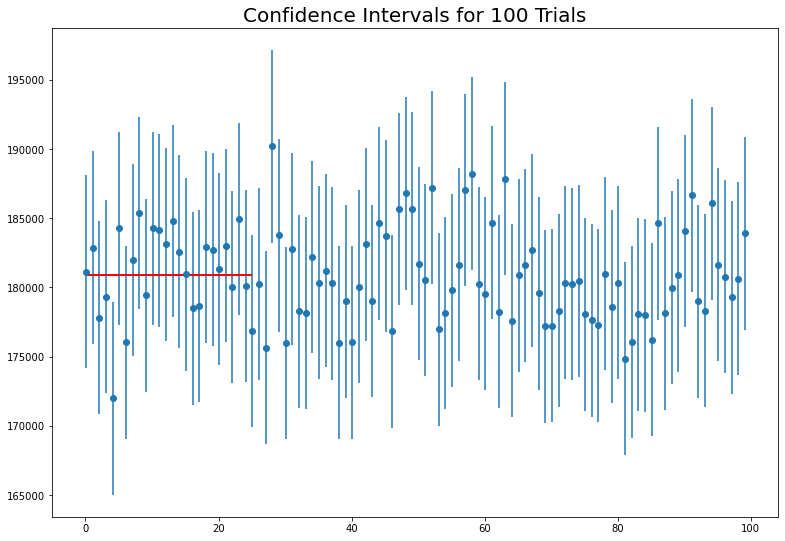

In [46]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    z_critical=stats.norm.ppf(.975)

    #Get population standard deviation
    pop_stdev=data_dm['SalePrice'].std()   
  
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

From the graph it looks like mean it captured in all the intervals. Hence, we can say the confidence intervals have captured the population mean fairly well